In [1]:
import qnmfits
import numpy as np
import bgp_qnm_fits as bgp 
from matplotlib import pyplot as plt

In [2]:
ID = "0001"

In [3]:
sim_main = bgp.SXS_CCE(ID, type="strain", lev="Lev5", radius="R2", zero_time=(2,2)) 
sim_lower = bgp.SXS_CCE(ID, type="strain", lev="Lev4", radius="R2", zero_time=(2,2))

sim_main_news = bgp.SXS_CCE(ID, type="news", lev="Lev5", radius="R2")
sim_lower_news = bgp.SXS_CCE(ID, type="news", lev="Lev4", radius="R2")

sim_main_psi4 = bgp.SXS_CCE(ID, type="psi4", lev="Lev5", radius="R2") 
sim_lower_psi4 = bgp.SXS_CCE(ID, type="psi4", lev="Lev4", radius="R2")

/data/vault/rvnd2/Code/qnmfits/qnmfits/Waveforms/Custom.py:167: RuntimeWarning: invalid value encountered in divide
  chif_norm = self.chif/self.chif_mag
/data/vault/rvnd2/Code/qnmfits/qnmfits/Waveforms/Base.py:116: RuntimeWarning: divide by zero encountered in divide
  chidot = self.Jdot/(self.Moft**2).reshape(len(self.Moft),1)


0.0
6.599999999999559
9.499999999999394


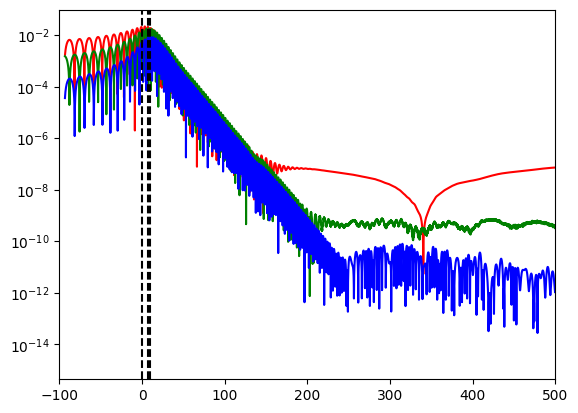

In [4]:
plt.plot(sim_main.times, np.abs(sim_main.h[(4,4)].real), color='red')
plt.plot(sim_main_news.times, np.abs(sim_main_news.h[(4,4)].real), color='green')
plt.plot(sim_main_psi4.times, np.abs(sim_main_psi4.h[(4,4)].real), color='blue')
plt.yscale("log")
plt.xlim(-100, 500)

max_times = [
    sim_main.times[np.argmax(np.abs(sim_main.h[(2,2)]))],
    sim_main_news.times[np.argmax(np.abs(sim_main_news.h[(2,2)]))],
    sim_main_psi4.times[np.argmax(np.abs(sim_main_psi4.h[(2,2)]))]
]

for t in max_times:
    plt.axvline(t, color='black', linestyle='--')
    print(t)

In [5]:
mask = (sim_main.times >= 0) & (sim_main.times <= 100)
max_abs_h22 = np.max(np.abs(sim_main.h[(2,2)][mask]))
print("Maximum of |h(2,2)| in [0, 100]:", max_abs_h22)

Maximum of |h(2,2)| in [0, 100]: 0.39328260577440266


In [6]:
mask = (sim_main_news.times >= 0) & (sim_main_news.times <= 100)
max_abs_h22_news = np.max(np.abs(sim_main_news.h[(2,2)][mask]))
print("Maximum of |h(2,2)| in [0, 100]:", max_abs_h22_news)

Maximum of |h(2,2)| in [0, 100]: 0.15925273907762244


In [7]:
mask = (sim_main_psi4.times >= 0) & (sim_main_psi4.times <= 100)
max_psi4 = np.max(np.abs(sim_main_psi4.h[(2,2)][mask]))
print("Maximum of |h(2,2)| in [0, 100]:", max_psi4)

Maximum of |h(2,2)| in [0, 100]: 0.03691895700679811


In [8]:
R_lm = bgp.get_residuals(sim_main, sim_lower, -10, 350, dt=0.1)
R_lm_news = bgp.get_residuals(sim_main_news, sim_lower_news, -10, 350, dt=0.1)
R_lm_psi4 = bgp.get_residuals(sim_main_psi4, sim_lower_psi4, -10, 350, dt=0.1)

KeyboardInterrupt: 

In [ ]:
times = np.arange(-10, 340, 0.1)

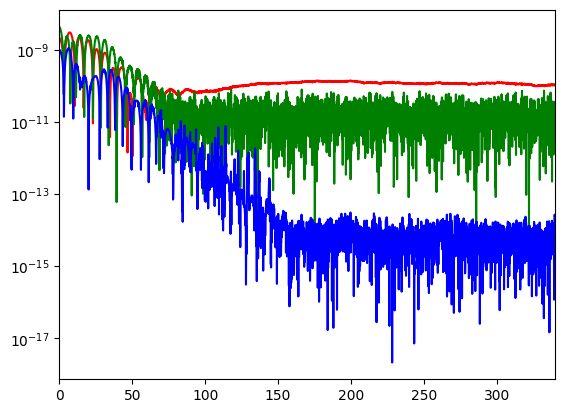

In [ ]:
plt.plot(times, np.abs(R_lm[(2,1)].real), color='red')
plt.plot(times, np.abs(R_lm_news[(2,1)].real), label="news", color='green')
plt.plot(times, np.abs(R_lm_psi4[(2,1)].real), label="psi4", color='blue')
plt.xlim(0, 340)
plt.yscale("log")

In [ ]:
max_abs_h22_R = np.max(np.abs(R_lm[(2,2)].real))
print("Maximum of |h(2,2)| in [0, 100]:", max_abs_h22_R)

max_abs_h22_R_news = np.max(np.abs(R_lm_news[(2,2)]))
print("Maximum of |h(2,2)| in [0, 100] news:", max_abs_h22_R_news)

max_psi4_R = np.max(np.abs(R_lm_psi4[(2,2)]))

Maximum of |h(2,2)| in [0, 100]: 0.001317441625495852
Maximum of |h(2,2)| in [0, 100] news: 0.0002625043319753098


In [ ]:
print(max_abs_h22/max_abs_h22_R)
print(max_abs_h22_news/max_abs_h22_R_news)
print(max_psi4/max_psi4_R)

print((max_abs_h22_news/max_abs_h22_R_news) / (max_abs_h22/max_abs_h22_R))

274.8309061195718
606.6042339730164
655.3506422923671
2.2071907506250357


In [ ]:
freqs = qnmfits.qnm.omega_list([(2,2,2,1)], sim_main.chif_mag, sim_main.Mf, s=-2)

In [9]:
N_max = 6
qnm_list = [(2, 2, n, 1) for n in np.arange(0, N_max + 1)]
spherical_modes = [(2, 2)]

T0_ref = 17
T = 100 

include_chif = True
include_Mf = True

tuned_param_dict_WN_strain = bgp.get_param_data("WN", data_type='strain')[ID]
tuned_param_dict_WN_news = bgp.get_param_data("WN", data_type='strain')[ID]


In [ ]:
fit_strain = bgp.BGP_fit(
    sim_main.times,
    sim_main.h,
    qnm_list,
    sim_main.Mf,
    sim_main.chif_mag,
    tuned_param_dict_WN_strain,
    bgp.kernel_WN,
    t0=T0_ref,
    use_nonlinear_params=False,
    num_samples=10000,
    t0_method="geq",
    T=T,
    spherical_modes=spherical_modes,
    include_chif=include_chif,
    include_Mf=include_Mf,
)


fit_news = bgp.BGP_fit(
    sim_main_news.times,
    sim_main_news.h,
    qnm_list,
    sim_main_news.Mf,
    sim_main_news.chif_mag,
    tuned_param_dict_WN_strain,
    bgp.kernel_WN,
    t0=T0_ref,
    use_nonlinear_params=False,
    num_samples=10000,
    t0_method="geq",
    T=T,
    spherical_modes=spherical_modes,
    include_chif=include_chif,
    include_Mf=include_Mf,
)

fit_psi4 = bgp.BGP_fit(
    sim_main_psi4.times,
    sim_main_psi4.h,
    qnm_list,
    sim_main_psi4.Mf,
    sim_main_psi4.chif_mag,
    tuned_param_dict_WN_psi4,
    bgp.kernel_WN,
    t0=T0_ref,
    use_nonlinear_params=False,
    num_samples=10000,
    t0_method="geq",
    T=T,
    spherical_modes=spherical_modes,
    include_chif=include_chif,
    include_Mf=include_Mf,
)

In [11]:
omegas = np.array(qnmfits.qnm.omega_list(qnm_list, sim_main_news.chif_mag, Mf=sim_main_news.Mf)) 

In [12]:
fit_strain.fit['ls_amplitudes']

Array([-0.22549146+0.04443668j,  0.00957694+0.05128498j,
        0.09848729-0.11204235j, -0.19443399+0.4398566j ,
        0.10457165-0.80781259j,  0.07324985+0.65377887j,
       -0.06313056-0.18773797j], dtype=complex128)

In [13]:
fit_news.fit['ls_amplitudes'] / (-1j * omegas)

Array([-0.22542273+0.04411776j,  0.00172289+0.04487603j,
        0.16674618-0.03615262j, -0.45845391+0.12271773j,
        0.62490846-0.24563628j, -0.39885726+0.22253051j,
        0.09198789-0.07092586j], dtype=complex128)